In [ ]:
# Importing necessary modules
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
%matplotlib inline

# Data collection and preprocessing

In [2]:
#loading the data
dataset_raw=pd.read_csv('/content/heart.xls')

In [3]:
dataset_raw.head(30)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
5,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0
6,45,F,ATA,130,237,0,Normal,170,N,0.0,Up,0
7,54,M,ATA,110,208,0,Normal,142,N,0.0,Up,0
8,37,M,ASY,140,207,0,Normal,130,Y,1.5,Flat,1
9,48,F,ATA,120,284,0,Normal,120,N,0.0,Up,0


In [4]:
dataset_raw.shape

(918, 12)

In [ ]:
#checking null value
dataset_raw.isnull().sum()


,0
Age,0
Sex,0
ChestPainType,0
RestingBP,0
Cholesterol,0
FastingBS,0
RestingECG,0
MaxHR,0
ExerciseAngina,0
Oldpeak,0


In [ ]:
#checking HeartDisease distribution
dataset_raw['HeartDisease'].value_counts()

,count
HeartDisease,
1,508
0,410


<Axes: xlabel='HeartDisease', ylabel='count'>

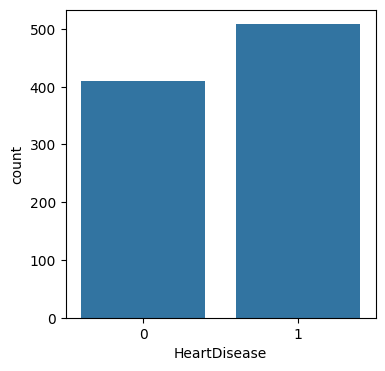

In [ ]:
plt.figure(figsize=(4, 4))
sns.countplot(x='HeartDisease', data = dataset_raw)

In [ ]:
#Checking for Duplicate data
Duplicate_data=dataset_raw[dataset_raw.duplicated()]
print(Duplicate_data)
dataset_raw.duplicated().sum()

Empty DataFrame
Columns: [Age, Sex, ChestPainType, RestingBP, Cholesterol, FastingBS, RestingECG, MaxHR, ExerciseAngina, Oldpeak, ST_Slope, HeartDisease]
Index: []


0

In [ ]:
dataset_raw.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [ ]:
# Heart disease-->1
#No Heart disease-->0

In [ ]:
dataset_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [ ]:
for c in dataset_raw.columns:
    if (dataset_raw[c].dtype == 'object'):
        print(c,dataset_raw[c].unique())

Sex ['M' 'F']
ChestPainType ['ATA' 'NAP' 'ASY' 'TA']
RestingECG ['Normal' 'ST' 'LVH']
ExerciseAngina ['N' 'Y']
ST_Slope ['Up' 'Flat' 'Down']


In [ ]:
#Label encoding
'''from sklearn.preprocessing import LabelEncoder

# Assuming 'dataset' is your DataFrame and 'CategoricalColumn' is the column to encode
label_encoder = LabelEncoder()
dataset['Chestpaintype_num'] = label_encoder.fit_transform(dataset['ChestPainType'])
dataset['Sex_num'] = label_encoder.fit_transform(dataset['Sex'])
dataset['RestingECG_num'] = label_encoder.fit_transform(dataset['RestingECG'])
dataset['ExerciseAngina_num'] = label_encoder.fit_transform(dataset['ExerciseAngina'])
dataset['ST_Slope_num'] = label_encoder.fit_transform(dataset['ST_Slope'])

dataset.head(918)'''

"from sklearn.preprocessing import LabelEncoder\n\n# Assuming 'dataset' is your DataFrame and 'CategoricalColumn' is the column to encode\nlabel_encoder = LabelEncoder()\ndataset['Chestpaintype_num'] = label_encoder.fit_transform(dataset['ChestPainType'])\ndataset['Sex_num'] = label_encoder.fit_transform(dataset['Sex'])\ndataset['RestingECG_num'] = label_encoder.fit_transform(dataset['RestingECG'])\ndataset['ExerciseAngina_num'] = label_encoder.fit_transform(dataset['ExerciseAngina'])\ndataset['ST_Slope_num'] = label_encoder.fit_transform(dataset['ST_Slope'])\n\ndataset.head(918)"

In [5]:
from sklearn.preprocessing import OneHotEncoder
#Extract categorical columns from the dataframe
#Here we extract the columns with object datatype as they are the categorical columns
categorical_columns = dataset_raw.select_dtypes(include=['object']).columns.tolist()

#Initialize OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)

# Apply one-hot encoding to the categorical columns
one_hot_encoded = encoder.fit_transform(dataset_raw[categorical_columns])

#Create a DataFrame with the one-hot encoded columns
#We use get_feature_names_out() to get the column names for the encoded data
one_hot_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(categorical_columns))

# Concatenate the one-hot encoded dataframe with the original dataframe
df_skencoded = pd.concat([dataset_raw, one_hot_df], axis=1)

# Drop the original categorical columns
df_skencoded = df_skencoded.drop(categorical_columns, axis=1)

with open('one_hot_encoder.pkl', 'wb') as f:
    pickle.dump(encoder, f)

In [8]:
#Seperating Features and target variable
df_skencoded.shape
df_skencoded.head(5)

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,...,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
1,49,160,180,0,156,1.0,1,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
2,37,130,283,0,98,0.0,0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
3,48,138,214,0,108,1.5,1,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
4,54,150,195,0,122,0.0,0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0


In [9]:
X_df_skencoded=df_skencoded.drop(columns=["HeartDisease"])
Y_df_skencoded=df_skencoded['HeartDisease']

# Performing Feature Selection
# Checking Correlation

In [ ]:
desired_columns_order = df_skencoded.columns.tolist()  # Get all columns in the original order
# Remove multiple columns one by one
#columns_to_remove = ["Sex","ChestPainType","RestingECG","ExerciseAngina","HeartDisease","ST_Slope"]
columns_to_remove = ["HeartDisease"]
for column in columns_to_remove:
    desired_columns_order.remove(column)

# Append 'HeartDisease' at the end of the list
desired_columns_order.append('HeartDisease')

# Rearrange columns using the `loc` method
dataset_c = df_skencoded.loc[:, desired_columns_order]

# Calculate correlation
correlation=dataset_c.corr()
correlation

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,...,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up,HeartDisease
Age,1.000000,0.254399,-0.095282,0.198039,-0.382045,0.258612,-0.055750,0.055750,0.166607,-0.218165,...,0.032042,0.145727,-0.230566,0.136798,-0.215793,0.215793,0.138397,0.185568,-0.258067,0.282039
RestingBP,0.254399,1.000000,0.100893,0.070193,-0.112135,0.164803,-0.005133,0.005133,0.048824,-0.046153,...,0.049855,0.053166,-0.116851,0.090447,-0.155101,0.155101,-0.007912,0.099207,-0.096146,0.107589
Cholesterol,-0.095282,0.100893,1.000000,-0.260974,0.235792,0.050148,0.200092,-0.200092,-0.120531,0.150954,...,0.017365,0.177077,-0.038470,-0.133106,0.034166,-0.034166,-0.083371,-0.050953,0.094027,-0.232741
FastingBS,0.198039,0.070193,-0.260974,1.000000,-0.131438,0.052698,-0.120076,0.120076,0.131176,-0.140514,...,0.026885,-0.011656,-0.093028,0.127110,-0.060451,0.060451,0.105102,0.107006,-0.161730,0.267291
MaxHR,-0.382045,-0.112135,0.235792,-0.131438,1.000000,-0.160691,0.189186,-0.189186,-0.354963,0.253735,...,0.100025,0.125793,0.023801,-0.157879,0.370425,-0.370425,-0.073316,-0.342581,0.383397,-0.400421
Oldpeak,0.258612,0.164803,0.050148,0.052698,-0.160691,1.000000,-0.105734,0.105734,0.280026,-0.262124,...,0.032231,0.086794,-0.116719,0.055958,-0.408752,0.408752,0.322130,0.283295,-0.450577,0.403951
Sex_F,-0.055750,-0.005133,0.200092,-0.120076,0.189186,-0.105734,1.000000,-1.000000,-0.183876,0.161522,...,0.004031,0.049518,0.010634,-0.063715,0.190664,-0.190664,-0.066036,-0.116077,0.150942,-0.305445
Sex_M,0.055750,0.005133,-0.200092,0.120076,-0.189186,0.105734,-1.000000,1.000000,0.183876,-0.161522,...,-0.004031,-0.049518,-0.010634,0.063715,-0.190664,0.190664,0.066036,0.116077,-0.150942,0.305445
ChestPainType_ASY,0.166607,0.048824,-0.120531,0.131176,-0.354963,0.280026,-0.183876,0.183876,1.000000,-0.522432,...,-0.249003,0.002289,-0.063606,0.076438,-0.430034,0.430034,0.103407,0.303645,-0.359443,0.516716
ChestPainType_ATA,-0.218165,-0.046153,0.150954,-0.140514,0.253735,-0.262124,0.161522,-0.161522,-0.522432,1.000000,...,-0.110679,-0.085791,0.107941,-0.046111,0.300365,-0.300365,-0.097754,-0.304667,0.357588,-0.401924


In [ ]:
print(correlation['HeartDisease'].sort_values(ascending=False))

HeartDisease         1.000000
ST_Slope_Flat        0.554134
ChestPainType_ASY    0.516716
ExerciseAngina_Y     0.494282
Oldpeak              0.403951
Sex_M                0.305445
Age                  0.282039
FastingBS            0.267291
ST_Slope_Down        0.122527
RestingBP            0.107589
RestingECG_ST        0.102527
RestingECG_LVH       0.010670
ChestPainType_TA    -0.054790
RestingECG_Normal   -0.091580
ChestPainType_NAP   -0.212964
Cholesterol         -0.232741
Sex_F               -0.305445
MaxHR               -0.400421
ChestPainType_ATA   -0.401924
ExerciseAngina_N    -0.494282
ST_Slope_Up         -0.622164
Name: HeartDisease, dtype: float64


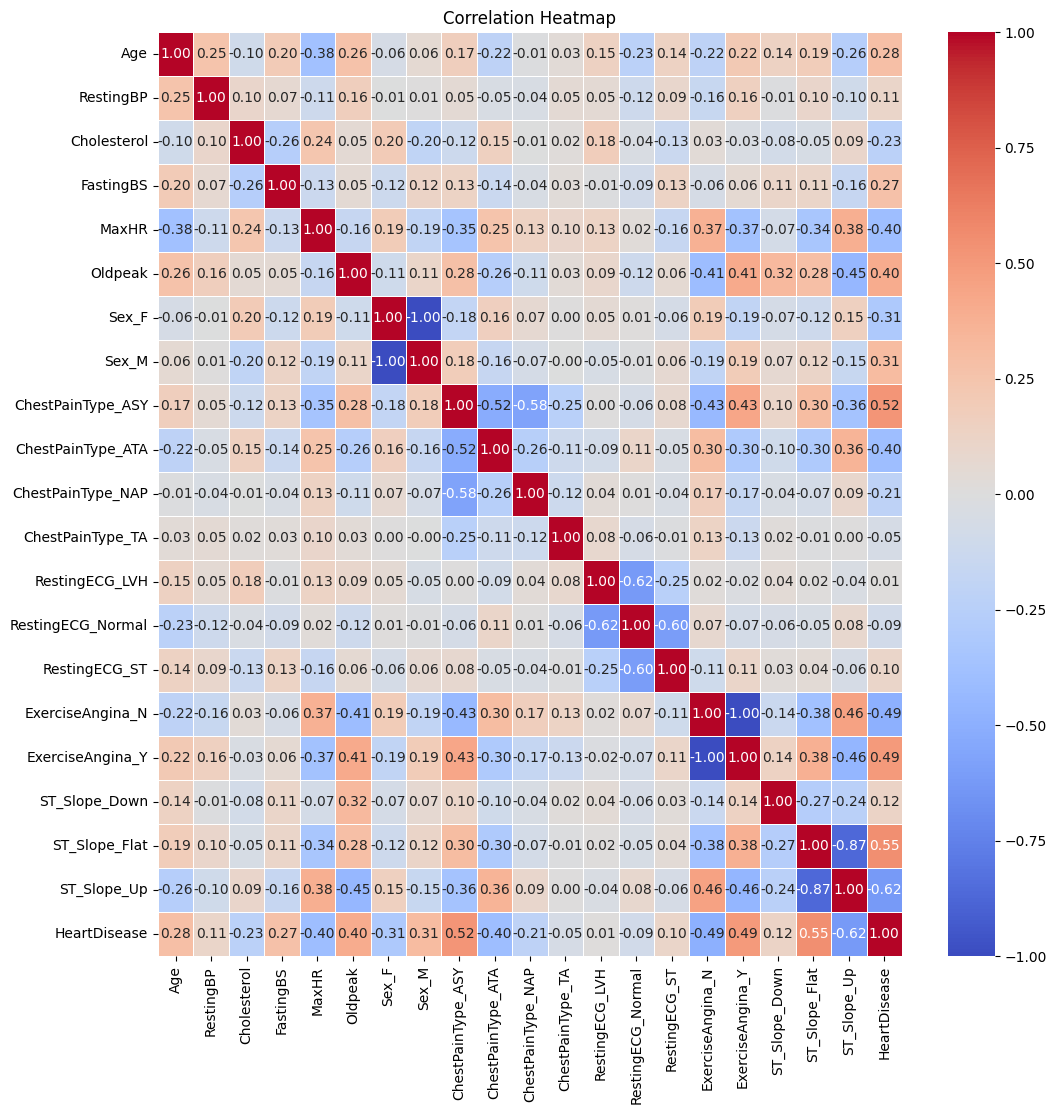

In [ ]:

# Plotting heatmap
plt.figure(figsize=(12, 12))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title("Correlation Heatmap")
plt.show()


<Axes: >

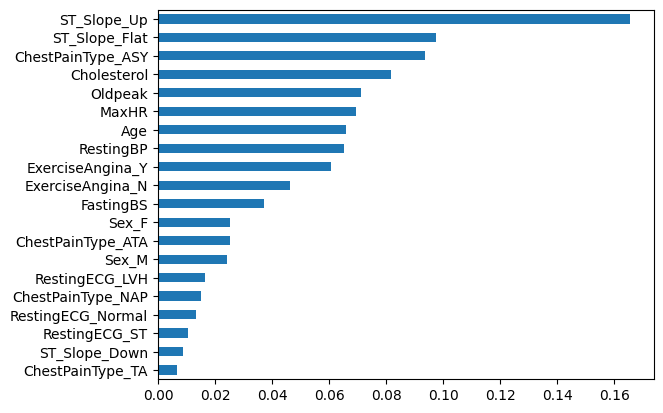

In [ ]:
#Imporatant Features
from sklearn.ensemble import ExtraTreesClassifier
corr=ExtraTreesClassifier()
corr.fit(X_df_skencoded,Y_df_skencoded)
feature_importance=pd.Series(corr.feature_importances_,index=X_df_skencoded.columns)
feature_importance.sort_values(ascending=True).plot(kind='barh')

In [6]:
# @title Feature Scaling
scaler=StandardScaler()

In [10]:
X_standard=scaler.fit_transform(X_df_skencoded)
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

In [11]:
#print(X_standard)
print(X_standard[:5, :])

[[-1.4331398   0.41090889  0.82507026 -0.55134134  1.38292822 -0.83243239
  -0.51595242  0.51595242 -1.08413811  2.07517671 -0.53283777 -0.22967867
  -0.50747832  0.81427482 -0.49044933  0.8235563  -0.8235563  -0.27144836
  -1.00218103  1.15067399]
 [-0.47848359  1.49175234 -0.17196105 -0.55134134  0.75415714  0.10566353
   1.93816322 -1.93816322 -1.08413811 -0.48188667  1.87674385 -0.22967867
  -0.50747832  0.81427482 -0.49044933  0.8235563  -0.8235563  -0.27144836
   0.99782372 -0.86905588]
 [-1.75135854 -0.12951283  0.7701878  -0.55134134 -1.52513802 -0.83243239
  -0.51595242  0.51595242 -1.08413811  2.07517671 -0.53283777 -0.22967867
  -0.50747832 -1.22808661  2.03894663  0.8235563  -0.8235563  -0.27144836
  -1.00218103  1.15067399]
 [-0.5845565   0.30282455  0.13903954 -0.55134134 -1.13215609  0.57471149
   1.93816322 -1.93816322  0.9223917  -0.48188667 -0.53283777 -0.22967867
  -0.50747832  0.81427482 -0.49044933 -1.21424608  1.21424608 -0.27144836
   0.99782372 -0.86905588]
 [ 0

In [12]:
# @title Test and Train splitting
X_train,X_test,Y_train,Y_test=train_test_split(X_standard,Y_df_skencoded,test_size=0.2,random_state=2)

In [13]:
print(X_standard.shape,X_train.shape,X_test.shape)

(918, 20) (734, 20) (184, 20)


In [14]:
def train_model(X_train, y_train, X_test, y_test, classifier, **kwargs):

    """
    Fit the chosen model and print out the score.

    """

    # instantiate model
    model = classifier(**kwargs)

    # train model
    model.fit(X_train,y_train)

    # check accuracy and print out the results
    fit_accuracy = model.score(X_train, y_train)
    test_accuracy = model.score(X_test, y_test)

    print(f"Train accuracy: {fit_accuracy:0.2%}")
    print(f"Test accuracy: {test_accuracy:0.2%}")

    return model


# K-Fold cross validation function

In [15]:
# K-Fold Cross-Validation
from sklearn.model_selection import cross_validate
def cross_validation(model, _X, _y, _cv=5):
      _scoring = ['accuracy', 'precision', 'recall', 'f1']

      results = cross_validate(estimator=model,
                               X=_X,
                               y=_y,
                               cv=_cv,
                               scoring=_scoring,
                               return_train_score=True)

      return {"Training Accuracy scores": results['train_accuracy'],
              "Mean Training Accuracy": results['train_accuracy'].mean()*100,
              "Training Precision scores": results['train_precision'],
              "Mean Training Precision": results['train_precision'].mean(),
              "Training Recall scores": results['train_recall'],
              "Mean Training Recall": results['train_recall'].mean(),
              "Training F1 scores": results['train_f1'],
              "Mean Training F1 Score": results['train_f1'].mean(),
              "Validation Accuracy scores": results['test_accuracy'],
              "Mean Validation Accuracy": results['test_accuracy'].mean()*100,
              "Validation Precision scores": results['test_precision'],
              "Mean Validation Precision": results['test_precision'].mean(),
              "Validation Recall scores": results['test_recall'],
              "Mean Validation Recall": results['test_recall'].mean(),
              "Validation F1 scores": results['test_f1'],
              "Mean Validation F1 Score": results['test_f1'].mean()
              }

# Logictic Regression

In [16]:

from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

logreg.fit(X_train, Y_train)

y_pred_lr = logreg.predict(X_test)

In [ ]:

'''from sklearn.metrics import accuracy_score
score_lr = round(accuracy_score(y_pred_lr,Y_test)*100,2)

print("The accuracy score achieved using Logistic Regression is: "+str(score_lr)+" %")'''

'from sklearn.metrics import accuracy_score\nscore_lr = round(accuracy_score(y_pred_lr,Y_test)*100,2)\n\nprint("The accuracy score achieved using Logistic Regression is: "+str(score_lr)+" %")'

In [17]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
LR_model = train_model(X_train, Y_train, X_test, Y_test, LogisticRegression)
with open('logistic_regression_model.pkl', 'wb') as file:
    pickle.dump(LR_model, file)

print("Model saved to 'logistic_regression_model.pkl'")


Train accuracy: 87.74%
Test accuracy: 84.24%
Model saved to 'logistic_regression_model.pkl'


<Axes: >

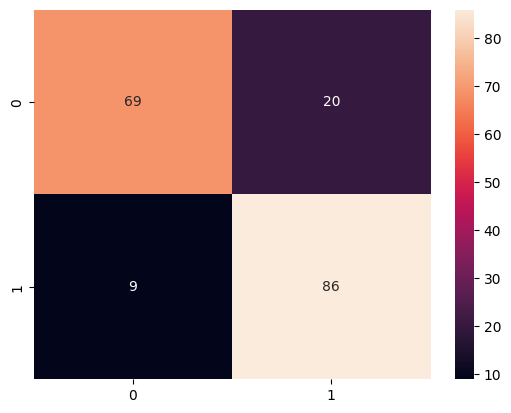

In [18]:

from sklearn.metrics import confusion_matrix


matrix= confusion_matrix(Y_test, y_pred_lr)


sns.heatmap(matrix,annot = True, fmt = "d")


In [19]:
# @title Precision
#if we study, keep this here, otherwise remove this and cell below it
from sklearn.metrics import precision_score


precision = precision_score(Y_test, y_pred_lr)


print("Precision: ",precision)

Precision:  0.8113207547169812


In [20]:
# @title Recall
from sklearn.metrics import recall_score


recall = recall_score(Y_test, y_pred_lr)


print("Recall is: ",recall)

Recall is:  0.9052631578947369


In [21]:
# @title F-Score
print((2*precision*recall)/(precision+recall))

0.8557213930348259


In [22]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# Assuming X_standard is your entire feature dataset and y is your target variable

# Create a classifier (e.g., Logistic Regression)
classifier = LogisticRegression()

# Perform k-fold cross-validation
# You can change the number of folds by adjusting the cv parameter
scores = cross_val_score(classifier, X_standard, Y_df_skencoded, cv=10)

# Print the cross-validated scores
print("Cross-validated scores:", scores)

# Print the mean and standard deviation of the scores
print("Mean accuracy:", scores.mean()*100)
print("Standard deviation:", scores.std())

Cross-validated scores: [0.82608696 0.92391304 0.85869565 0.94565217 0.86956522 0.84782609
 0.88043478 0.82608696 0.72527473 0.79120879]
Mean accuracy: 84.94744386048734
Standard deviation: 0.06012952344279882


In [ ]:
'''#cross validation
lr_model = LogisticRegression()
lr_result = cross_validation(lr_model, X_standard, Y, 5)
print(lr_result)'''

'#cross validation\nlr_model = LogisticRegression()\nlr_result = cross_validation(lr_model, X_standard, Y, 5)\nprint(lr_result)'

# Naive Bayes

In [23]:
from sklearn.naive_bayes import GaussianNB
nb_model = train_model(X_train, Y_train, X_test, Y_test, GaussianNB)

nb_model.fit(X_train, Y_train)

y_pred_nb = nb_model.predict(X_test)

with open('Naive_model.pkl', 'wb') as file:
    pickle.dump(nb_model, file)

print("Model saved to 'logistic_regression_model.pkl'")

Train accuracy: 86.24%
Test accuracy: 86.41%
Model saved to 'logistic_regression_model.pkl'


In [ ]:

'''score_nb = round(accuracy_score(y_pred_nb,Y_test)*100,2)

print("The accuracy score achieved using Naive Bayes is: "+str(score_nb)+" %")'''

'score_nb = round(accuracy_score(y_pred_nb,Y_test)*100,2)\n\nprint("The accuracy score achieved using Naive Bayes is: "+str(score_nb)+" %")'

<Axes: >

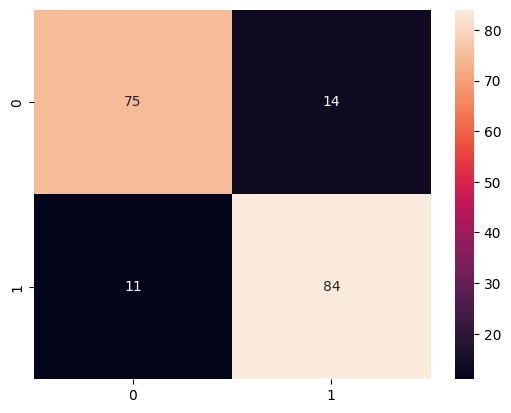

In [24]:
from sklearn.metrics import confusion_matrix


matrix= confusion_matrix(Y_test, y_pred_nb)


sns.heatmap(matrix,annot = True, fmt = "d")

In [25]:
# Precision
from sklearn.metrics import precision_score


precision = precision_score(Y_test, y_pred_nb)


print("Precision: ",precision)

Precision:  0.8571428571428571


In [26]:
# Recall


from sklearn.metrics import recall_score


recall = recall_score(Y_test, y_pred_nb)


print("Recall is: ",recall)



Recall is:  0.8842105263157894


In [27]:
# F-Score
print((2*precision*recall)/(precision+recall))

0.8704663212435233


In [28]:
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler

# Naive Bayes classifier
classifier = GaussianNB()

# Perform k-fold cross-validation
scores = cross_val_score(classifier, X_standard, Y_df_skencoded, cv=5)

# Print the cross-validated scores
print("Cross-validated scores:", scores)

# Print the mean and standard deviation of the scores
print("Mean accuracy:", scores.mean()*100)
print("Standard deviation:", scores.std())

Cross-validated scores: [0.85326087 0.88043478 0.82608696 0.81967213 0.80874317]
Mean accuracy: 83.76395818484201
Standard deviation: 0.0259489842850267


In [ ]:
'''#cross validation
nb_model = GaussianNB()
nb_result = cross_validation(nb_model, X_standard, Y, 5)
print(nb_result)'''

'#cross validation\nnb_model = GaussianNB()\nnb_result = cross_validation(nb_model, X_standard, Y, 5)\nprint(nb_result)'

# K Nearest Neighbors

In [29]:
# KNN
from sklearn.neighbors import KNeighborsClassifier
knn_model = train_model(X_train, Y_train, X_test, Y_test, KNeighborsClassifier, n_neighbors=8)

knn_model.fit(X_train, Y_train)


y_pred_knn = knn_model.predict(X_test)

with open('KNN_model.pkl', 'wb') as file:
    pickle.dump(knn_model, file)

print("Model saved to 'logistic_regression_model.pkl'")


Train accuracy: 88.56%
Test accuracy: 85.33%
Model saved to 'logistic_regression_model.pkl'


In [ ]:
'''score_knn = round(accuracy_score(y_pred_knn,Y_test)*100,2)

print("The accuracy score achieved using KNN is: "+str(score_knn)+" %")'''

'score_knn = round(accuracy_score(y_pred_knn,Y_test)*100,2)\n\nprint("The accuracy score achieved using KNN is: "+str(score_knn)+" %")'

<Axes: >

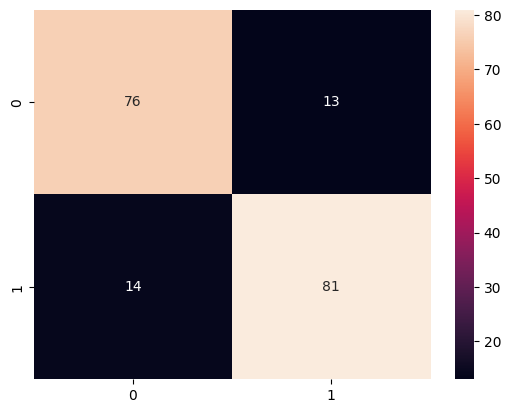

In [ ]:
# Confusuion matrix for KNN


from sklearn.metrics import confusion_matrix


matrix= confusion_matrix(Y_test, y_pred_knn)


sns.heatmap(matrix,annot = True, fmt = "d")



In [ ]:
# @title Precision
from sklearn.metrics import precision_score


precision = precision_score(Y_test, y_pred_knn)


print("Precision: ",precision)


Precision:  0.8617021276595744


In [ ]:
# Recall


from sklearn.metrics import recall_score


recall = recall_score(Y_test, y_pred_knn)


print("Recall is: ",recall)



Recall is:  0.8526315789473684


In [ ]:
# F-Score
print((2*precision*recall)/(precision+recall))

0.8571428571428572


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

# Create a KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=8)
# Perform k-fold cross-validation
scores = cross_val_score(classifier, X_standard, Y_df_skencoded, cv=5)

# Print the cross-validated scores
print("Cross-validated scores:", scores)

# Print the mean and standard deviation of the scores
print("Mean accuracy:", scores.mean()*100)
print("Standard deviation:", scores.std())


Cross-validated scores: [0.85326087 0.80434783 0.8423913  0.81967213 0.78142077]
Mean accuracy: 82.02185792349728
Standard deviation: 0.025849071501650563


In [ ]:
'''#cross validation
knn_model = KNeighborsClassifier()
knn_result = cross_validation(knn_model, X_standard, Y, 5)
print(knn_result)'''

'#cross validation\nknn_model = KNeighborsClassifier()\nknn_result = cross_validation(knn_model, X_standard, Y, 5)\nprint(knn_result)'